### Further Data Exploration : PCA and GMM



In [2]:
%matplotlib inline

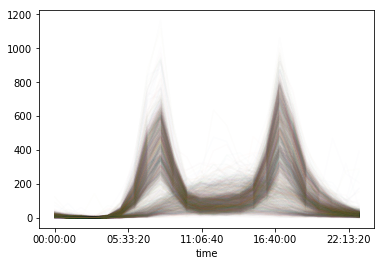

In [3]:
from jupyterworkflow.data import get_fremont_data
data = get_fremont_data()

pivoted = data.pivot_table('Total', index = data.index.time, columns = data.index.date)
pivoted.plot(legend = False, alpha = 0.01);

In [4]:
X = pivoted.fillna(0).T.values
X.shape

(2036, 24)

In [7]:
import sklearn
sklearn.__version__

'0.19.1'

In [13]:
from sklearn.decomposition import PCA
X2 = PCA(2, svd_solver = 'full').fit_transform(X)

In [14]:
X2.shape

(2036, 2)

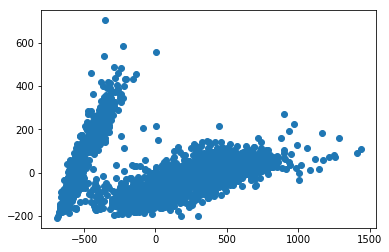

In [16]:
import matplotlib.pyplot as plt
plt.scatter(X2[:, 0], X2[:, 1]);

In [18]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(2)
gmm.fit(X)
labels = gmm.predict(X)
labels

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

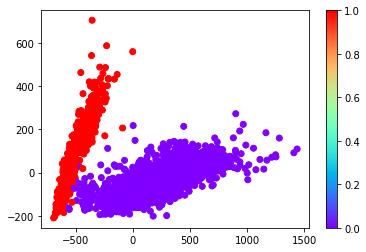

In [21]:
plt.scatter(X2[:, 0], X2[:, 1], c = labels, cmap = 'rainbow');
plt.colorbar();

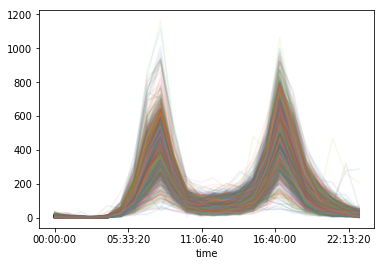

In [24]:
pivoted.T[labels == 0].T.plot(legend = False, alpha = 0.1);

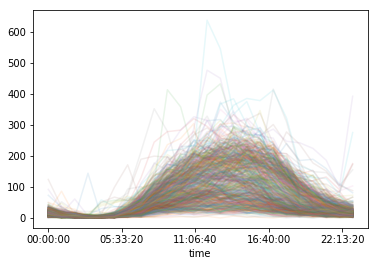

In [25]:
pivoted.T[labels == 1].T.plot(legend = False, alpha = 0.1);

In [28]:
import pandas as pd

In [31]:
dayofweek = pd.DatetimeIndex(pivoted.columns).dayofweek

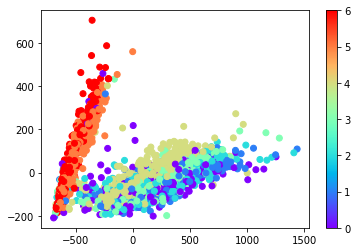

In [32]:
plt.scatter(X2[:, 0], X2[:, 1], c = dayofweek, cmap = 'rainbow');
plt.colorbar();

In [33]:
dates = pd.DatetimeIndex(pivoted.columns)
dates[(labels == 1) & (dayofweek < 5)]

DatetimeIndex(['2012-11-22', '2012-11-23', '2012-12-24', '2012-12-25',
               '2013-01-01', '2013-05-27', '2013-07-04', '2013-07-05',
               '2013-09-02', '2013-11-28', '2013-11-29', '2013-12-20',
               '2013-12-24', '2013-12-25', '2014-01-01', '2014-04-23',
               '2014-05-26', '2014-07-04', '2014-09-01', '2014-11-27',
               '2014-11-28', '2014-12-24', '2014-12-25', '2014-12-26',
               '2015-01-01', '2015-05-25', '2015-07-03', '2015-09-07',
               '2015-11-26', '2015-11-27', '2015-12-24', '2015-12-25',
               '2016-01-01', '2016-05-30', '2016-07-04', '2016-09-05',
               '2016-11-24', '2016-11-25', '2016-12-26', '2017-01-02',
               '2017-02-06', '2017-05-29', '2017-07-04', '2017-09-04',
               '2017-11-23', '2017-11-24', '2017-12-25', '2017-12-26',
               '2018-01-01'],
              dtype='datetime64[ns]', freq=None)